# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing Dataset

In [ ]:
data=pd.read_excel('/content/customer_retention_dataset.xlsx')

In [ ]:
data.head(2)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"


# Understanding the data

In [ ]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [ ]:
dict = {'1Gender of respondent':'Gender', '2 How old are you? ':'Age',
       '3 Which city do you shop online from?':'City',
       '4 What is the Pin Code of where you shop online from?':'Pincode',
       '5 Since How Long You are Shopping Online ?':'Shopping Since',
       '6 How many times you have made an online purchase in the past 1 year?':'No.of times Last year',
       '7 How do you access the internet while shopping on-line?':'Internet',
       '8 Which device do you use to access the online shopping?':'Device',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Screen_Size',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'First_time_through',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'How_Reached_to_e_store',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Time_to_make Decisions',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Payment_By',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Just_added_to_kart',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':"Didn't_bought_why?",
       '18 The content on the website must be easy to read and understand':'Easy_to_read',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Product_comparision',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'Listed_seller_important',
       '21 All relevant information on listed products must be stated clearly':"Clear_relevant_Information",
       '22 Ease of navigation in website':'Easy_navigation', '23 Loading and processing speed':'Speed_Website/App',
       '24 User friendly Interface of the website':'User_friendly_interface',
       '25 Convenient Payment methods':'Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust_ontime_delevery',
       '27 Empathy (readiness to assist with queries) towards the customers':'Assitance_to_customer',
       '28 Being able to guarantee the privacy of the customer':'Privacy',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Contact us',
       '30 Online shopping gives monetary benefit and discounts':'Benefits',
       '31 Enjoyment is derived from shopping online':'Enjoyment',
       '32 Shopping online is convenient and flexible':'Flexibility',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return_replacement_importance',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Loyalty_program_benefits',
       '35 Displaying quality Information on the website improves satisfaction of customers':'Satisfaction_display',
       '36 User derive satisfaction while shopping on a good quality website or application':'Satisfaction_quality_mode',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Satifaction_benefit',
       '38 User satisfaction cannot exist without trust':'Satisfaction_and_trust',
       '39 Offering a wide variety of listed product in several category':'Variety',
       '40 Provision of complete and relevant product information':'Complete_Information',
       '41 Monetary savings':'Savings',
       '42 The Convenience of patronizing the online retailer':'Patronizing_Convenience',
       '43 Shopping on the website gives you the sense of adventure':'Shopping_adventures',
       '44 Shopping on your preferred e-tailer enhances your social status':'Social_status',
       '45 You feel gratification shopping on your favorite e-tailer':'Gratification',
       '46 Shopping on the website helps you fulfill certain roles':'FulFill_roles',
       '47 Getting value for money spent':'value_for_Money',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'Visted_E-Store_of',
       'Easy to use website or application':'Ease_to_use',
       'Visual appealing web-page layout':'Webpage_layout', 'Wild variety of product on offer':'Variety_product',
       'Complete, relevant description information of products':'Complete_description',
       'Fast loading website speed of website and application':'Speed_Application',
       'Reliability of the website or application':'Reliability',
       'Quickness to complete purchase':'Quickness',
       'Availability of several payment options':'Availability', 'Speedy order delivery ':'Quick_delivery',
       'Privacy of customers’ information':'Privacy of customers',
       'Security of customer financial information':'financial_information_safety',
       'Perceived Trustworthiness':'Trustworthiness',
       'Presence of online assistance through multi-channel':'Online_assistance',
       'Longer time to get logged in (promotion, sales period)':'Buffering',
       'Longer time in displaying graphics and photos (promotion, sales period)':'graphics_loading',
       'Late declaration of price (promotion, sales period)':'Late_declaration_price ',
       'Longer page loading time (promotion, sales period)':'Longer_page_loading_time',
       'Limited mode of payment on most products (promotion, sales period)':'Limited_mode_of_payment',
       'Longer delivery period':'Longer_delivery_period', 'Change in website/Application design':'website/Application_design',
       'Frequent disruption when moving from one page to another':'Frequent disruption ',
       'Website is as efficient as before':'website_efficiency',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommend'}

In [ ]:
data.rename(columns=dict,inplace=True)
data.head(2)

,Gender,Age,City,Pincode,Shopping Since,No.of times Last year,Internet,Device,Screen_Size,OS,...,Buffering,graphics_loading,Late_declaration_price,Longer_page_loading_time,Limited_mode_of_payment,Longer_delivery_period,website/Application_design,Frequent disruption,website_efficiency,Recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"


In [ ]:
data.nunique()

Gender                         2
Age                            5
City                          11
Pincode                       39
Shopping Since                 5
                              ..
Longer_delivery_period         6
website/Application_design     7
Frequent disruption            8
website_efficiency             8
Recommend                      8
Length: 71, dtype: int64

In [ ]:
# num_var = [feature for feature in data.columns if data[feature].dtypes != 'O']
# cat_var = [feature for feature in data.columns if feature not in num_var]
# for i in cat_var:
#   print(i,'\n')
#   print(data[i].unique(),"\n")

In [ ]:
# for col in cat_var:
#   CrosstabResult=pd.crosstab(index=data['Gender'],columns=data[col])
#   CrosstabResult.plot.bar()
  

## EDA

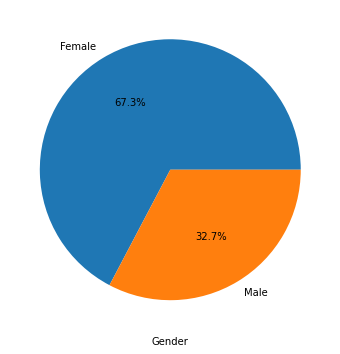

<Figure size 432x288 with 0 Axes>

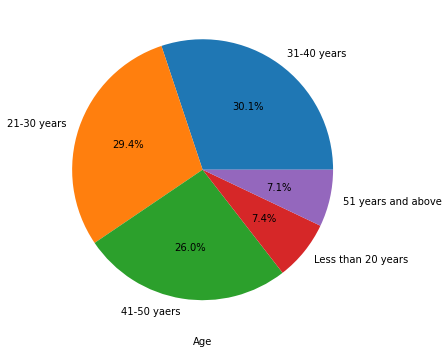

<Figure size 432x288 with 0 Axes>

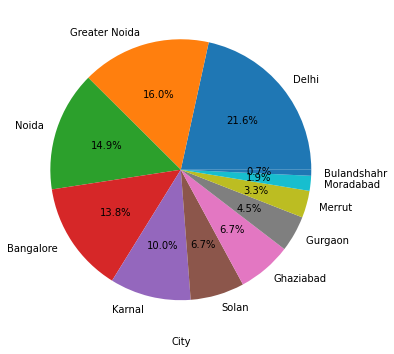

<Figure size 432x288 with 0 Axes>

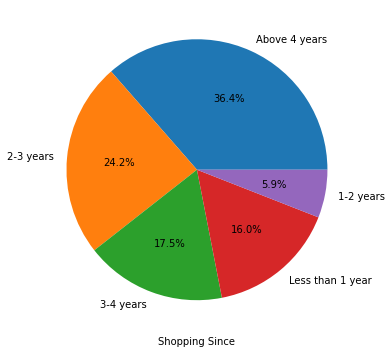

<Figure size 432x288 with 0 Axes>

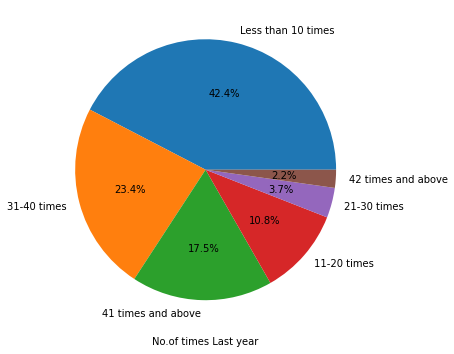

<Figure size 432x288 with 0 Axes>

In [ ]:
# Univariate Analysis
personal_info=['Gender','Age','City',
               'Pincode','Shopping Since',
                   'No.of times Last year']

for i in personal_info:
    if i!='Pincode':
        plt.figure(figsize=(8,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure();

## Gender
The women are almost twice than men who have taken this survey.

## Age
Majority of the people taking this survey are in their 30's followed by 20's, teenagers and senior citizen are the least in number. 
 
##City
Majority of the people taking this survey belong from delhi, noida and banglore, ambiguity can also be seen as noida has two categories (noida and grater noida) which need to be handled 
 
## Shopping Since
Majority of the people taking this survey shopping online have been shopping from a long time. 
 
## No of times in a Year
Majority of the people taking this survey shop online 10 times a year, amiguity can also be seen for range '41 and above' '42 times and above' which needs to be handled

# Analysis on the basis of Various following factors
## Intention of Repeat purchase:

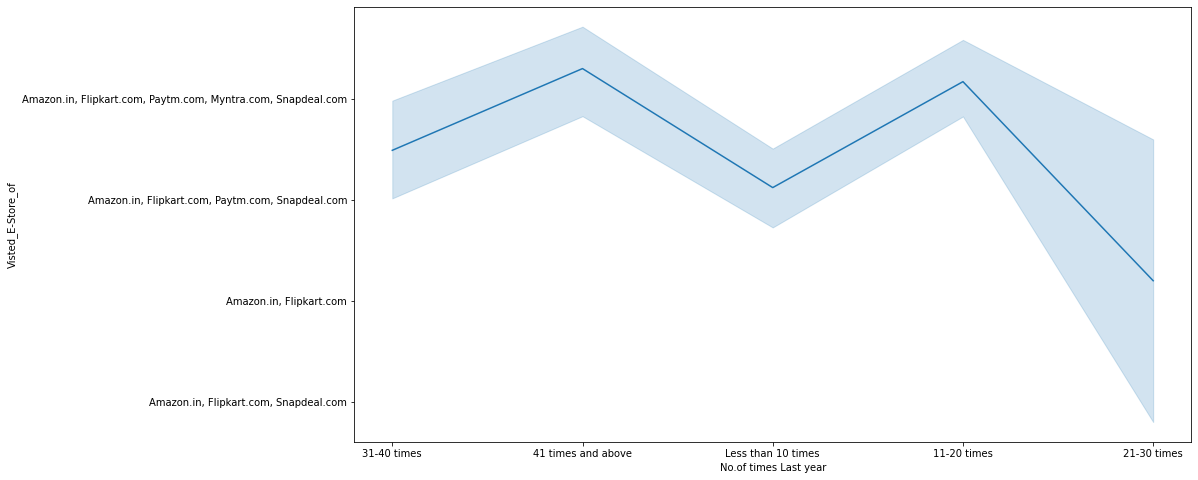

In [ ]:
#Resolving ambiguity of column 
#Changing 42 times and above to 41 times and above
data['No.of times Last year'].replace('42 times and above','41 times and above',
                                                                                inplace=True)
## Plot line Graph
plt.figure(figsize=(15,8))
sns.lineplot(data['No.of times Last year'],
              data['Visted_E-Store_of'])


## No.of times Last year

Heavy shoppers who shop more than 41 times a year shop from all the online brands 

### People shopping less than 10 times a year seem to exclude myntra (prefer amazon,flipkart,snapdeal,paytm)

### Note
People shop from Amazon and flipkart whatever be the case.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

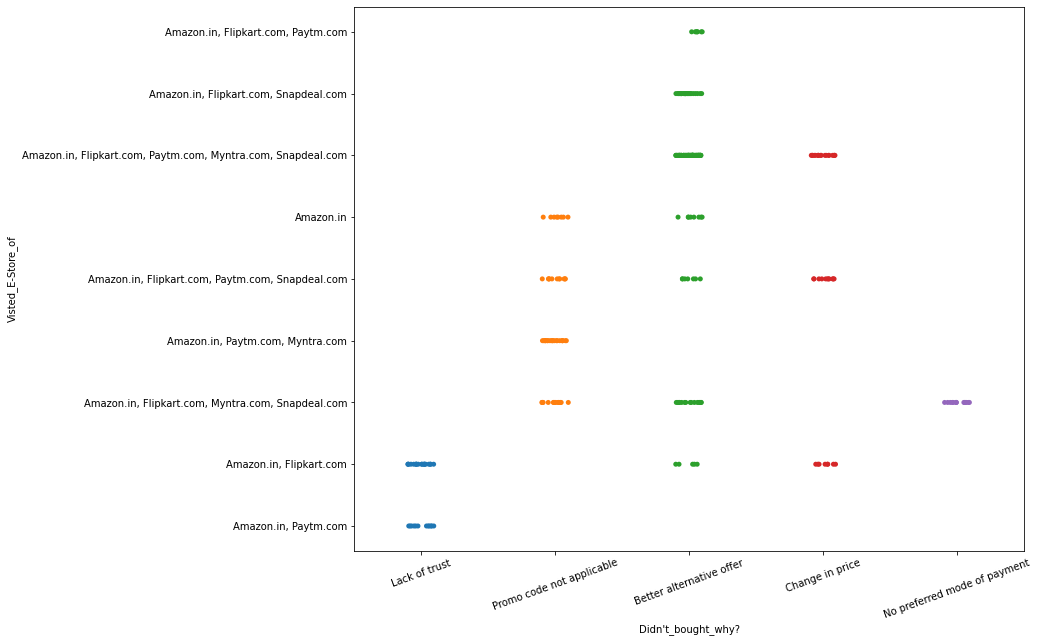

In [ ]:

plt.figure(figsize=(12,10))
sns.stripplot(data["Didn't_bought_why?"],data['Visted_E-Store_of'])
plt.xticks(rotation=20)


## E-stores v/s Reason not to Buy

Majority of the time people abandon the bag is beacuse they get a better alternative offer or promo code not applicable.

Change in price is also a reason (it can be delivery Charges)
### Note
There is also lack of trust seen in amazon, flipkart and paytm by some people.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

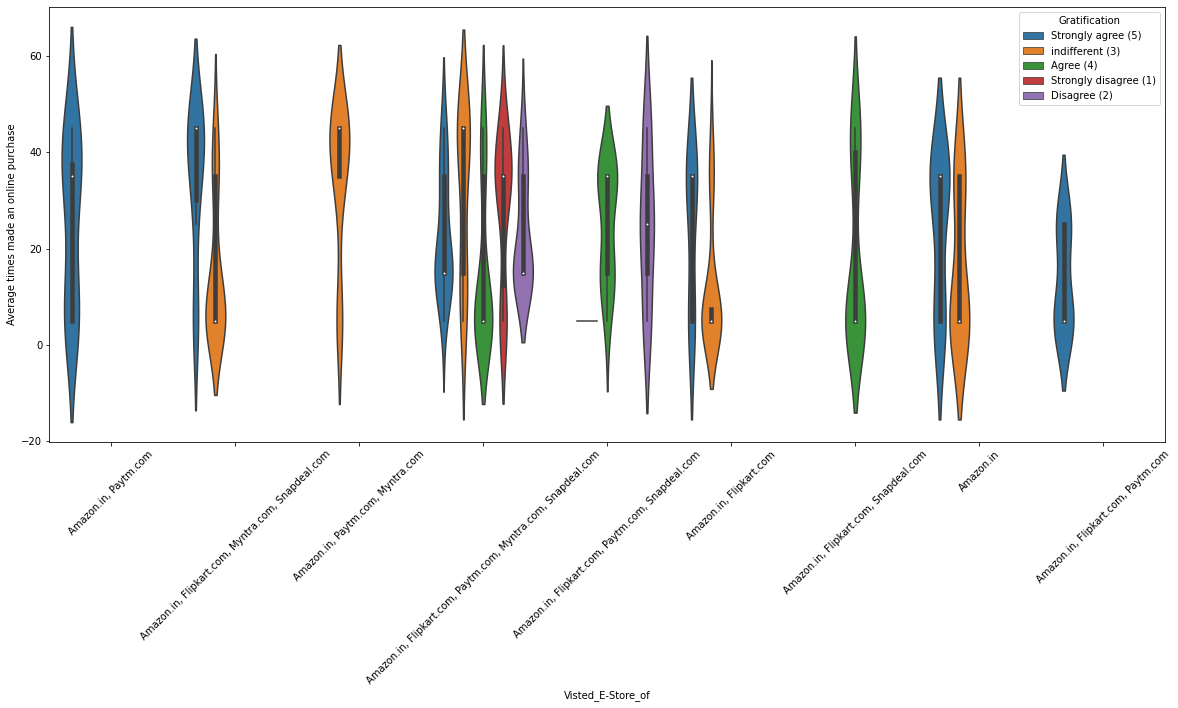

In [ ]:
# Converting years to numbers for better analysis by take mid points of the intervals
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
data['Average times made an online purchase']=data['No.of times Last year'].replace(dict)
plt.figure(figsize=(20,8))
sns.violinplot(data['Visted_E-Store_of'],
               data['Average times made an online purchase'],hue=data['Gratification'])
plt.xticks(rotation=45)

## Gratification:
Majority of  the people who have shopped from amazon, flipkart and paytm are satisfied. 

### Also data Implies
People who shop from a more number of online brands dosent seem to be satisfied.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

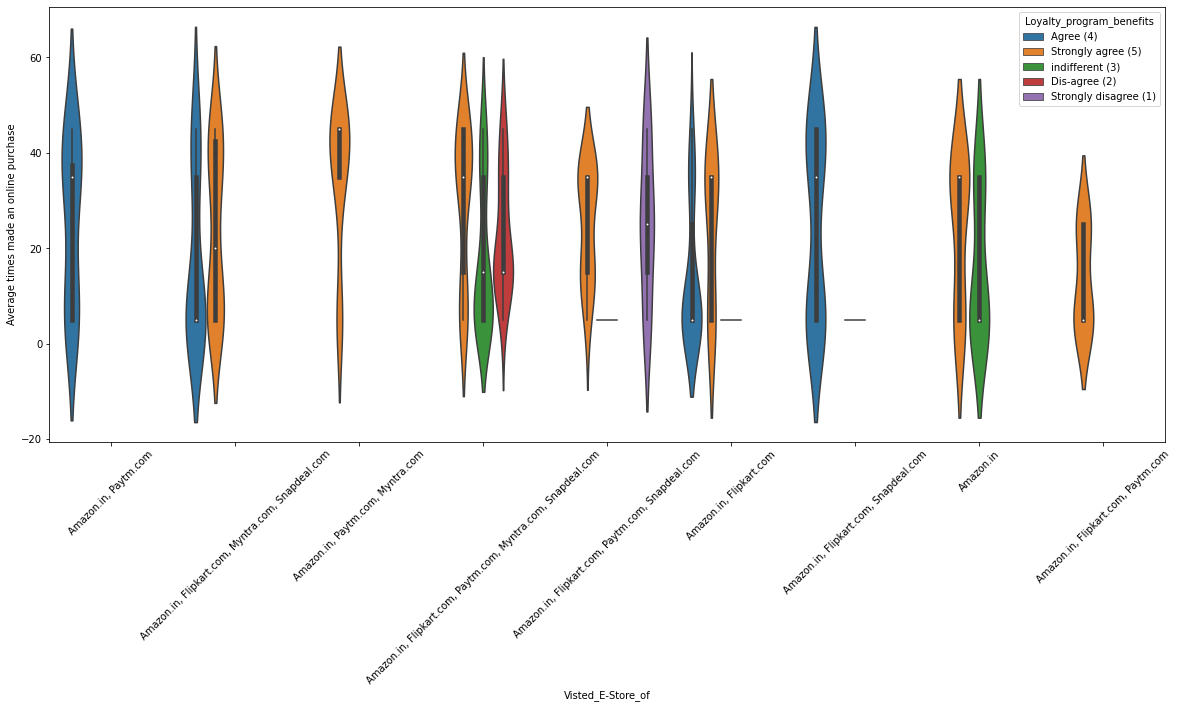

In [ ]:
## Loyality analysis
plt.figure(figsize=(20,8))
sns.violinplot(data['Visted_E-Store_of'],
               data['Average times made an online purchase'],hue=data['Loyalty_program_benefits'])
plt.xticks(rotation=45)

# Loyalty_program_benefits

### People shopping from amazon and paytm are getting benefits from the loyalty points

### flipkart and snapdeal also seems to give such benefits 

### Contrary People who shop from almost everywhere disagree with this statement too

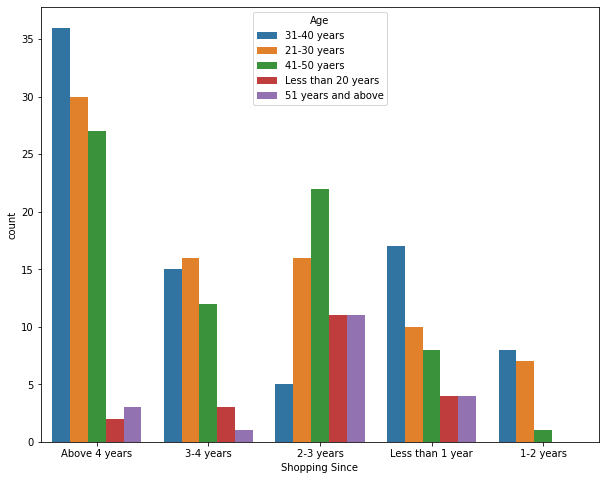

In [ ]:
# Online Retailing:
plt.figure(figsize=(10,8))
sns.countplot(data['Shopping Since'],hue=data['Age'])

## Age vs Shopping Since
Highest number of people in the Survey have been shopping online for above 4 years except for the age group below 20 years and above 50 years. 

### Note
People who are shopping online for 1-2 years are in the age group of 20-50 
no teenager and elder people


In [ ]:
data.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping Since',
       'No.of times Last year', 'Internet', 'Device', 'Screen_Size', 'OS',
       'Browser', 'First_time_through', 'How_Reached_to_e_store',
       'Time_to_make Decisions', 'Payment_By', 'Just_added_to_kart',
       'Didn't_bought_why?', 'Easy_to_read', 'Product_comparision',
       'Listed_seller_important', 'Clear_relevant_Information',
       'Easy_navigation', 'Speed_Website/App', 'User_friendly_interface',
       'Convenient Payment methods', 'Trust_ontime_delevery',
       'Assitance_to_customer', 'Privacy', 'Contact us', 'Benefits',
       'Enjoyment', 'Flexibility', 'Return_replacement_importance',
       'Loyalty_program_benefits', 'Satisfaction_display',
       'Satisfaction_quality_mode', 'Satifaction_benefit',
       'Satisfaction_and_trust', 'Variety', 'Complete_Information', 'Savings',
       'Patronizing_Convenience', 'Shopping_adventures', 'Social_status',
       'Gratification', 'FulFill_roles', 'value_for_M

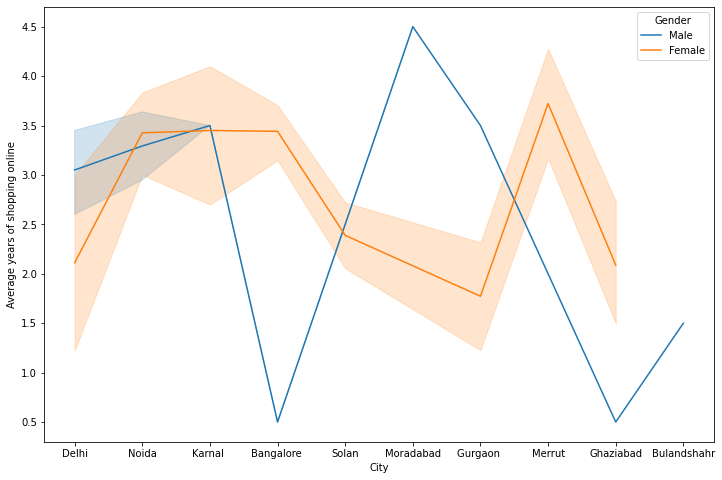

In [ ]:

# Converting Years to numbers for better analysis from mid points
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}

data['Average years of shopping online']=data['Shopping Since'].replace(dict)

#Changing Greater noida to noida
data['City'].replace({'Greater Noida':'Noida'},inplace=True)

# City v/s Average years
plt.figure(figsize=(12,8))
sns.lineplot(data['City'],data['Average years of shopping online'],hue=data['Gender'])

## City v/s Average years (Gender)

#### OBSERVATIONS
-> lines Graph shows density of female customers is more than male(survey is taken by females more than male)

-> Highest number of men shopping online belong from delhi and noida, while men from Moradabad have been shopping online for the longest.

-> Women from meerut and noida have shopped the longest.

-> Men living in Banglore and Ghaziabad shop have shopped online for less than 1 year. 

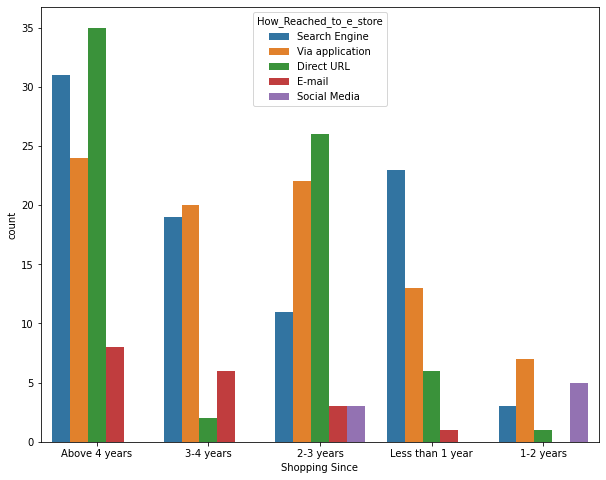

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data['Shopping Since'],
              hue=data['How_Reached_to_e_store'])

### How_Reached_to_e_store

Traffic to the e-stores are not Only through the Application 
people are shopping through direct urls and search Engine .
Search Engine optimisation can increase traffic on the E store

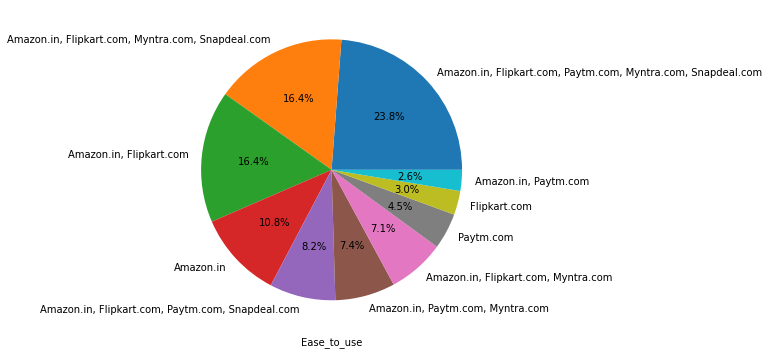

<Figure size 432x288 with 0 Axes>

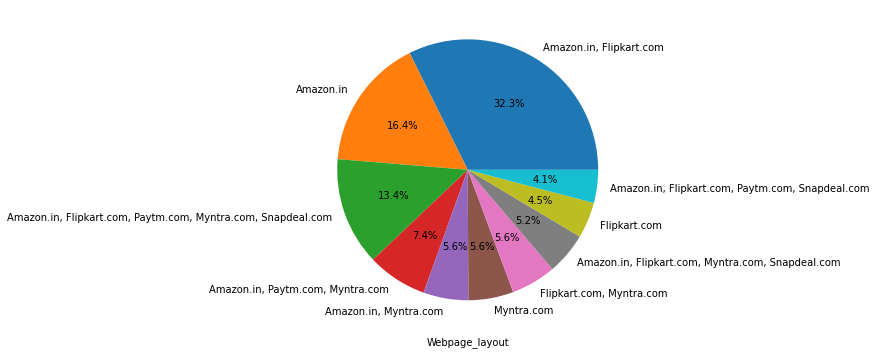

<Figure size 432x288 with 0 Axes>

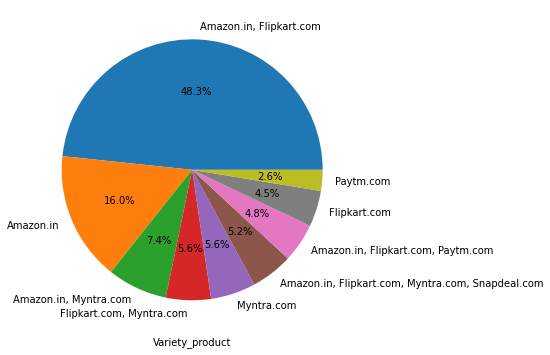

<Figure size 432x288 with 0 Axes>

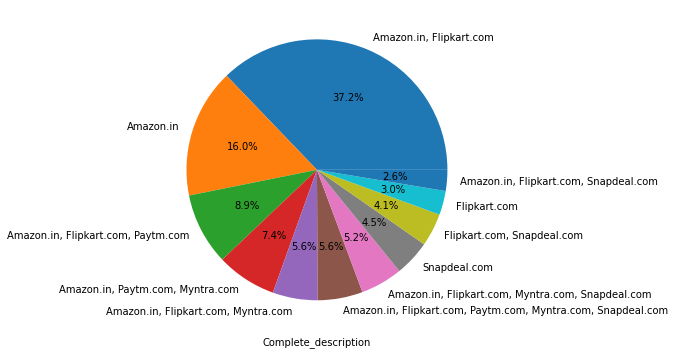

<Figure size 432x288 with 0 Axes>

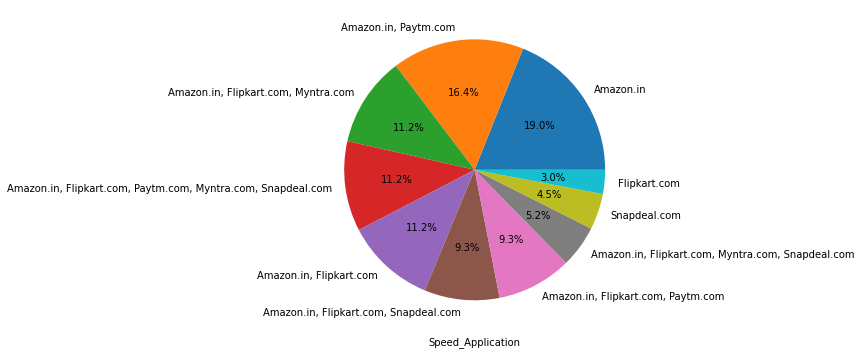

<Figure size 432x288 with 0 Axes>

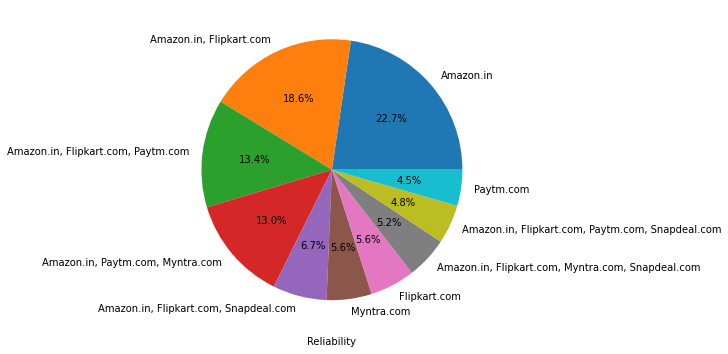

<Figure size 432x288 with 0 Axes>

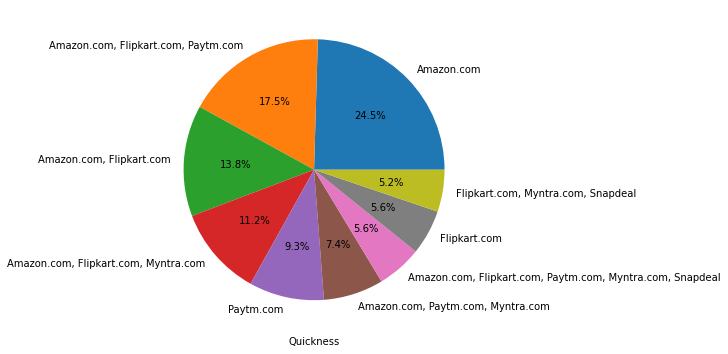

<Figure size 432x288 with 0 Axes>

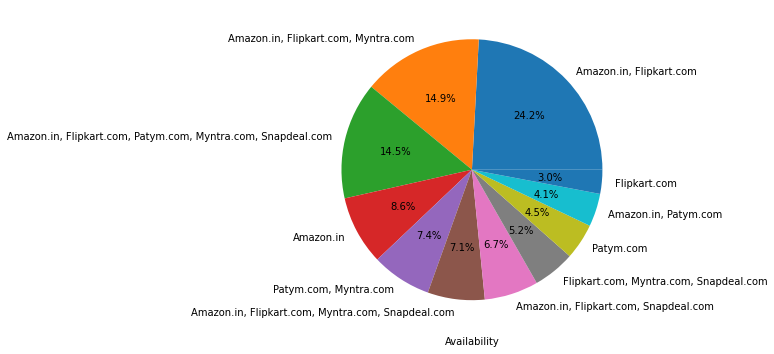

<Figure size 432x288 with 0 Axes>

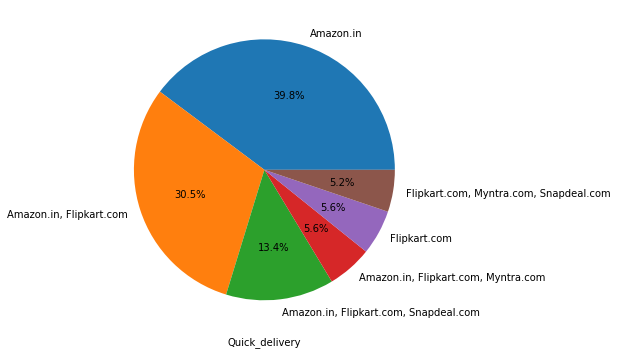

<Figure size 432x288 with 0 Axes>

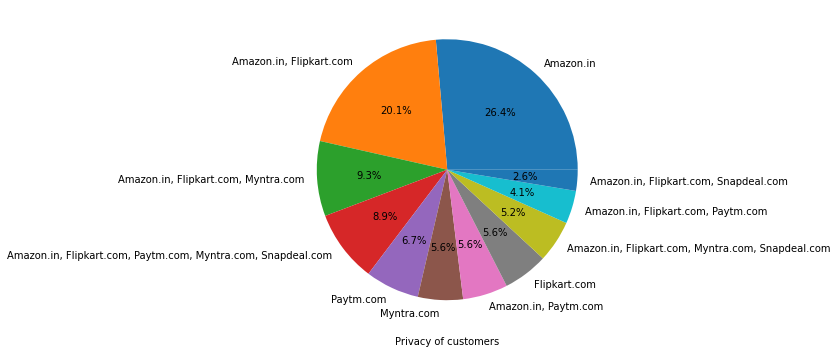

<Figure size 432x288 with 0 Axes>

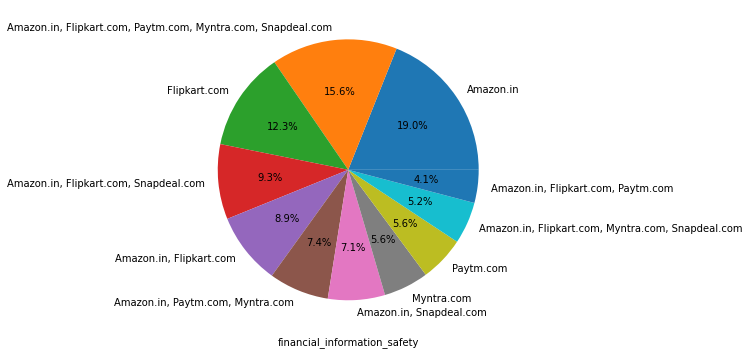

<Figure size 432x288 with 0 Axes>

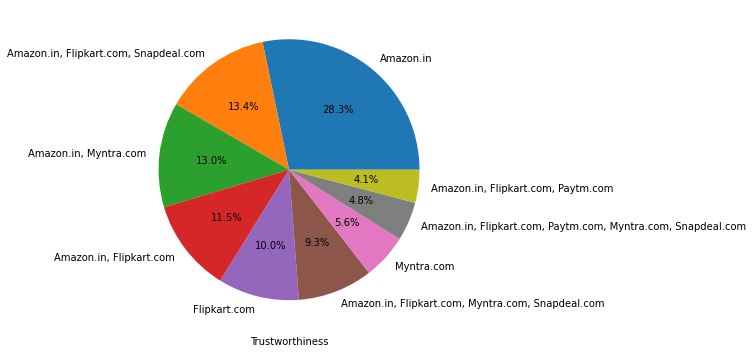

<Figure size 432x288 with 0 Axes>

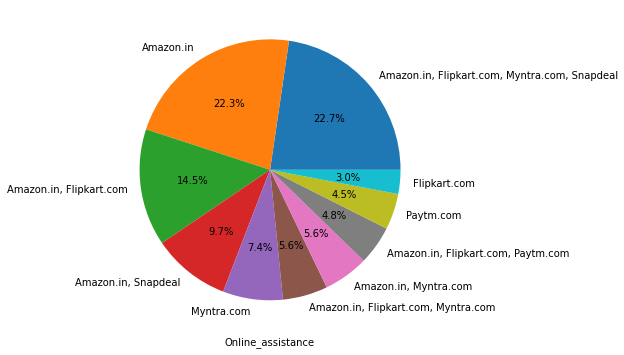

<Figure size 432x288 with 0 Axes>

In [ ]:
# Brand image
performance=[ 'Ease_to_use', 'Webpage_layout', 'Variety_product',
       'Complete_description', 'Speed_Application', 'Reliability', 'Quickness',
       'Availability', 'Quick_delivery', 'Privacy of customers',
       'financial_information_safety', 'Trustworthiness', 'Online_assistance',]
for i in performance:
        plt.figure(figsize=(8,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()


## Brand Image

Amazon, Flipkart have been had the highest votes and have maintained a very good brand image followed by Paytm and the Myntra.

# Loyalty v/s neagtive side to the E-store

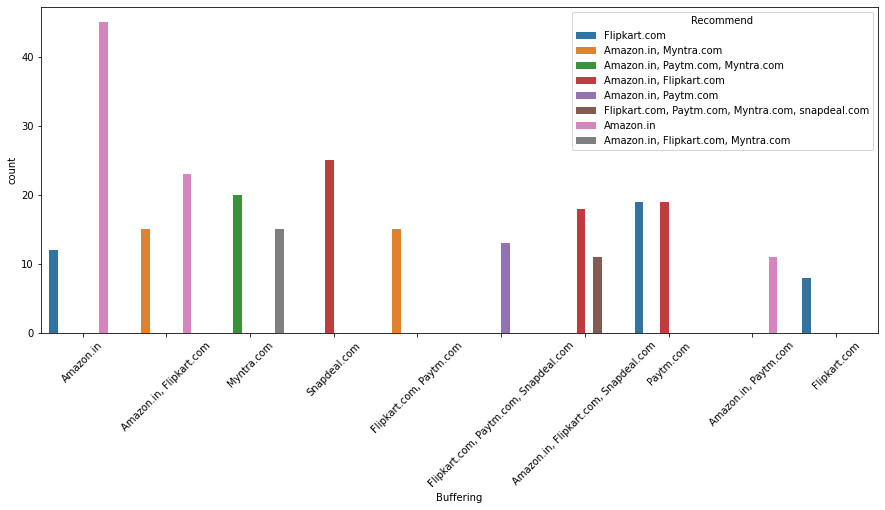

<Figure size 432x288 with 0 Axes>

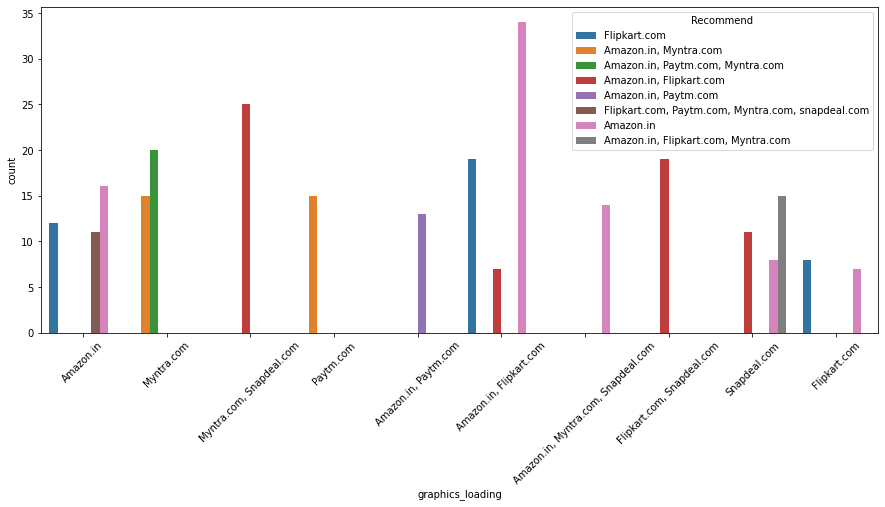

<Figure size 432x288 with 0 Axes>

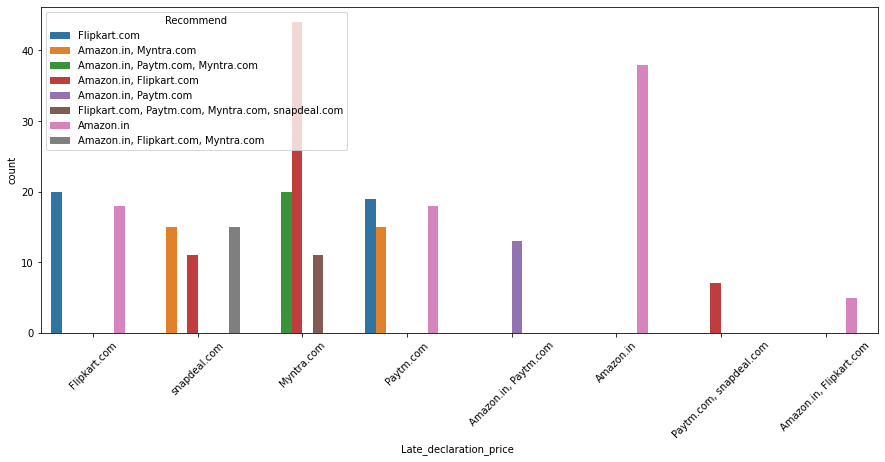

<Figure size 432x288 with 0 Axes>

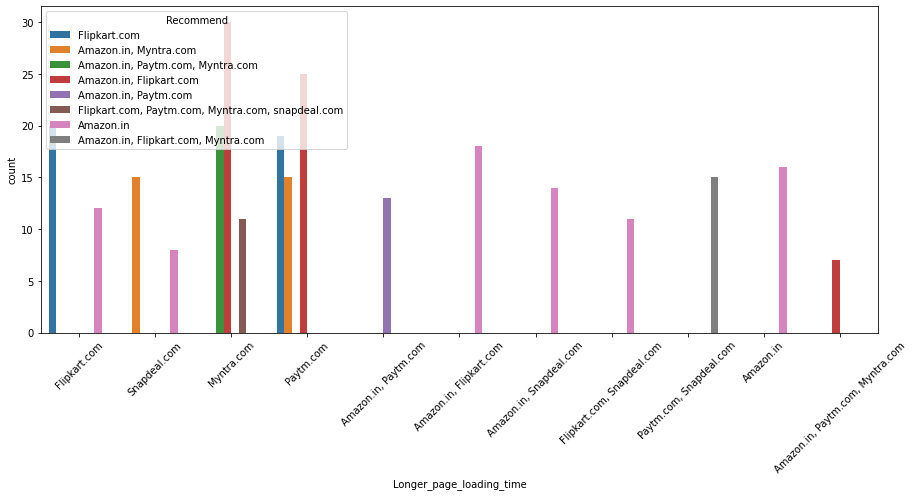

<Figure size 432x288 with 0 Axes>

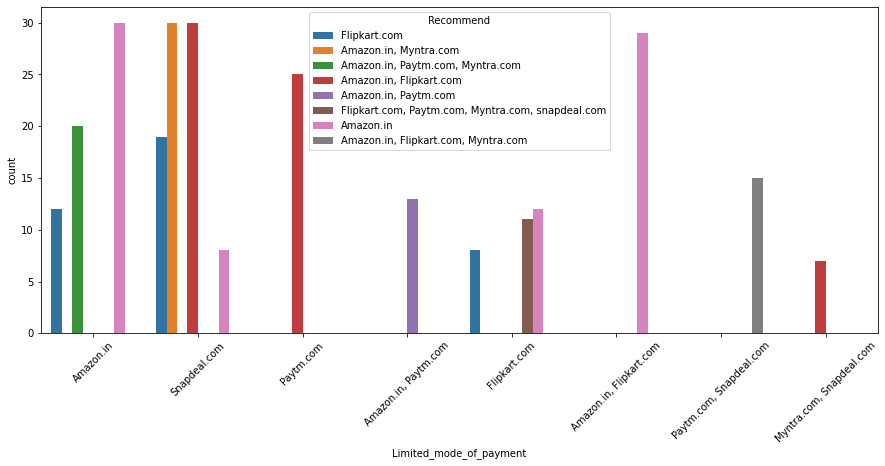

<Figure size 432x288 with 0 Axes>

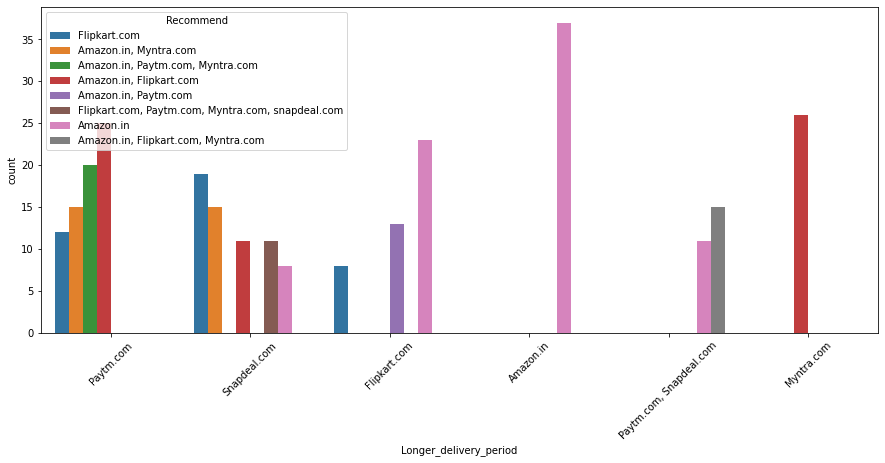

<Figure size 432x288 with 0 Axes>

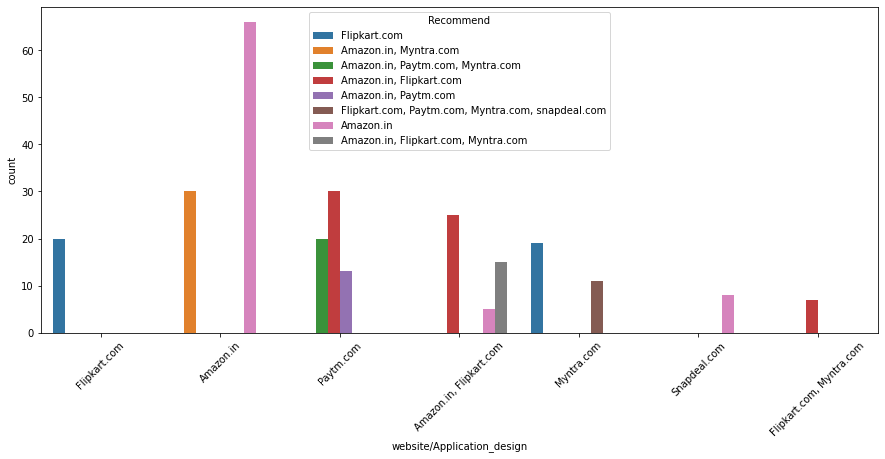

<Figure size 432x288 with 0 Axes>

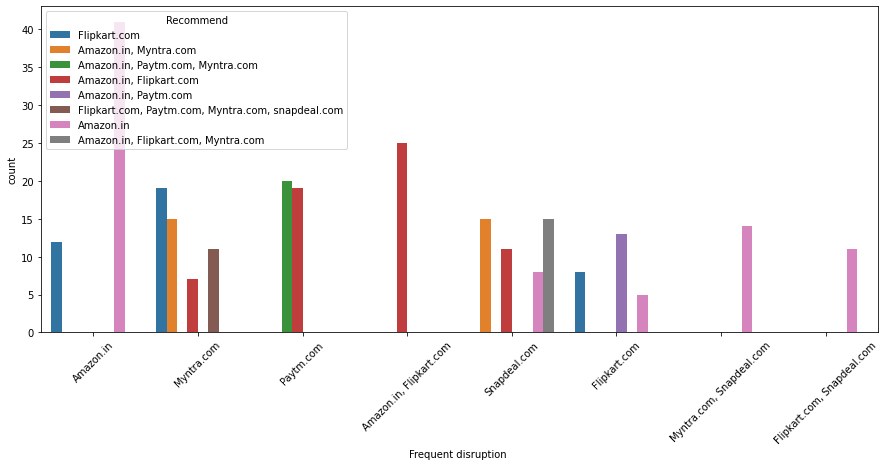

<Figure size 432x288 with 0 Axes>

In [ ]:
#Collecting all the negative remarks about a brand
bad=['Buffering', 'graphics_loading', 'Late_declaration_price ',
       'Longer_page_loading_time', 'Limited_mode_of_payment',
       'Longer_delivery_period', 'website/Application_design',
       'Frequent disruption ']

for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(data[i],hue=data['Recommend'])
        plt.xticks(rotation=45)
        plt.figure()


## Recommendation v/s Bad experience

Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks about them still they would recommend these platforms to their friend

Or

there no better alternative to these Giants

#Conclusion 
 This study suggest following outputs which might be useful for E-commerce websites to extend their business


* The cost of the product, the reliability of the E-commerce company and the return policies all play an equally important role in deciding the buying behaviour of online customers. 

* The return policies are important because in online retail customer does not get to feel the product. Thus, he/she wants to be sure that it will be possible to return the product if he does not like it in real.

* The cost is an important factor as it was the basic criteria used by online retailers to attract customers. The reliability of the E-commerce company is also important, as it is even required in offline retail. It is important because customers are paying online, so they need to be sure of security of the online transaction. 


* All the websites Un equally preferred by online customers. Amazon was the most preferred followed by Flipkart. These two companies are most trusted in the industry and hence, have a huge reliability. Also, the sellers listed on these websites are generally from Tier 1 cities as compared to Snapdeal and PayTM which have more sellers from tier 2 and 3 cities. Also, these websites have the most FLEXIBLE return policies as compared to others and also the time required to process a return is low as well.
 

# Case Study done will try hand for model building taking recommend as the target variable

# Data Preprocessing

In [ ]:
# create copy of the original data
x=data.copy()
x.drop('Recommend',axis=1,inplace=True)
y=data['Recommend']

# Encoding Categorical Features

cat=[i for i in x.columns if x[i].dtypes=='O']
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

oe=OrdinalEncoder()
le=LabelEncoder()
#using ordinal encoder for independent features
for i in cat:
    x[i]=oe.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for Label Column
y=le.fit_transform(y)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

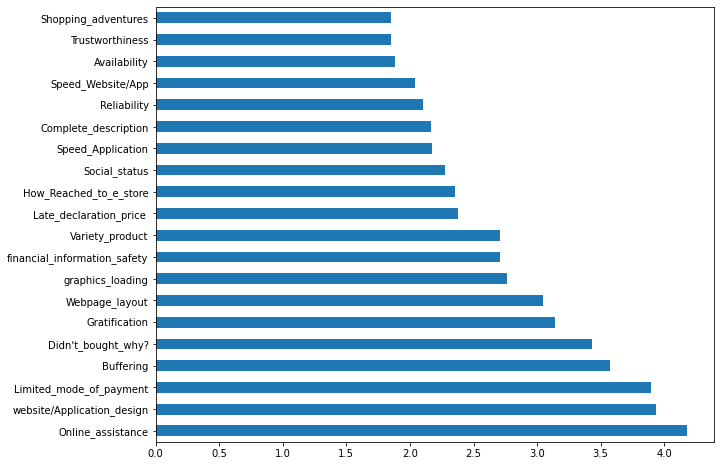

In [ ]:
## Extra tree classifier to pick important columns
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
clf.fit(x,y)
feat_import = pd.Series(clf.feature_importances_*100, index=x.columns)

plt.figure(figsize=(10,8))
feat_import.nlargest(20).plot(kind='barh')
plt.show()

## Most important Features which decides wheather a user will recommend E-store to his/her friend

In [ ]:
x.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping Since',
       'No.of times Last year', 'Internet', 'Device', 'Screen_Size', 'OS',
       'Browser', 'First_time_through', 'How_Reached_to_e_store',
       'Time_to_make Decisions', 'Payment_By', 'Just_added_to_kart',
       'Didn't_bought_why?', 'Easy_to_read', 'Product_comparision',
       'Listed_seller_important', 'Clear_relevant_Information',
       'Easy_navigation', 'Speed_Website/App', 'User_friendly_interface',
       'Convenient Payment methods', 'Trust_ontime_delevery',
       'Assitance_to_customer', 'Privacy', 'Contact us', 'Benefits',
       'Enjoyment', 'Flexibility', 'Return_replacement_importance',
       'Loyalty_program_benefits', 'Satisfaction_display',
       'Satisfaction_quality_mode', 'Satifaction_benefit',
       'Satisfaction_and_trust', 'Variety', 'Complete_Information', 'Savings',
       'Patronizing_Convenience', 'Shopping_adventures', 'Social_status',
       'Gratification', 'FulFill_roles', 'value_for_M

In [ ]:
x.drop(['Average times made an online purchase','Average years of shopping online'],axis=1,inplace=True)

In [ ]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
x

,Gender,Age,City,Pincode,Shopping Since,No.of times Last year,Internet,Device,Screen_Size,OS,Browser,First_time_through,How_Reached_to_e_store,Time_to_make Decisions,Payment_By,Just_added_to_kart,Didn't_bought_why?,Easy_to_read,Product_comparision,Listed_seller_important,Clear_relevant_Information,Easy_navigation,Speed_Website/App,User_friendly_interface,Convenient Payment methods,Trust_ontime_delevery,Assitance_to_customer,Privacy,Contact us,Benefits,Enjoyment,Flexibility,Return_replacement_importance,Loyalty_program_benefits,Satisfaction_display,Satisfaction_quality_mode,Satifaction_benefit,Satisfaction_and_trust,Variety,Complete_Information,Savings,Patronizing_Convenience,Shopping_adventures,Social_status,Gratification,FulFill_roles,value_for_Money,Visted_E-Store_of,Ease_to_use,Webpage_layout,Variety_product,Complete_description,Speed_Application,Reliability,Quickness,Availability,Quick_delivery,Privacy of customers,financial_information_safety,Trustworthiness,Online_assistance,Buffering,graphics_loading,Late_declaration_price,Longer_page_loading_time,Limited_mode_of_payment,Longer_delivery_period,website/Application_design,Frequent disruption,website_efficiency
0,1.434161,-0.280013,-0.874259,-0.787498,0.576221,-0.601383,-2.908068,-2.002898,0.788282,0.995479,-0.478277,0.387772,-0.052686,-0.520950,1.687952,0.491044,0.424073,-1.463979,0.240714,0.300510,-0.968760,-1.202929,1.609598,-1.199905,-0.327888,-0.303545,-0.033414,-1.613627,-1.059333,1.556493,0.573087,-0.480389,-0.690118,-1.403777,1.544074,0.721224,-1.792340,0.699856,1.291471,1.494962,-0.402399,1.418597,-0.991056,-1.469289,-0.168752,-1.215357,0.569553,1.470522,2.293241,1.434191,1.251231,2.316835,1.848976,2.017255,1.936706,1.751130,-0.870755,-0.983146,-1.365073,1.354610,2.094282,-1.212050,-1.281109,-0.401985,-0.346963,-1.305101,0.153218,-0.088257,-1.405192,-0.984697
1,-0.697272,-1.126343,-0.874259,-0.787348,0.576221,0.158110,1.290163,0.664328,-2.392435,-0.158762,-0.478277,0.387772,1.235716,0.977826,0.174422,1.773481,1.684575,0.560753,0.993646,1.028772,0.892643,0.694947,0.934119,0.446903,0.788592,0.730046,-0.033414,0.217874,0.259929,0.163160,-0.109039,0.483974,0.572751,0.010515,0.126477,0.721224,0.308486,0.699856,0.437894,0.578915,0.648527,1.418597,1.616221,1.064293,-0.168752,-0.024351,0.569553,-0.821311,-0.195858,0.721072,1.695856,-0.332383,-0.622012,1.667163,-0.351613,-0.553117,-0.201517,1.685236,1.435641,1.712557,-0.430387,-0.912380,0.610666,1.503458,1.407417,1.152404,1.314223,-1.019284,0.161634,-0.523228
2,-0.697272,-1.126343,1.053411,-0.136585,-0.275446,0.158110,-1.508658,0.664328,-0.271957,-1.313002,-0.478277,0.387772,1.235716,-1.270338,1.687952,0.491044,1.684575,0.560753,-1.265149,-1.156015,-0.968760,-1.202929,-1.092317,0.446903,0.788592,0.730046,-0.033414,0.217874,0.259929,0.163160,-0.109039,0.483974,0.572751,0.010515,0.126477,0.721224,0.308486,-1.067855,0.437894,0.578915,0.648527,-0.894146,-0.991056,-1.469289,1.092201,1.166655,-0.810715,1.928889,1.463541,1.077632,0.806606,1.323378,1.142980,0.966981,0.792547,2.080308,-0.870755,-0.983146,0.502069,0.996663,1.733615,0.885643,0.610666,0.074376,0.354789,-1.305101,0.153218,1.308284,0.945047,-0.984697
3,1.434161,-1.126343,0.089576,-0.630707,-0.275446,0.917603,-1.508658,0.664328,-0.271957,-0.158762,2.259094,0.387772,-0.052686,-0.520950,0.174422,-0.791392,-0.836430,-1.463979,-1.265149,0.300510,-0.968760,0.694947,-1.092317,0.446903,0.788592,-1.337137,-0.033414,0.217874,-1.059333,-1.230174,1.255214,1.448336,-1.952987,1.424807,1.544074,-1.434435,1.358898,-1.067855,-1.269259,-1.253180,0.648527,-0.894146,-0.991056,-0.202498,-1.429705,1.166655,-0.810715,0.095422,0.218991,0.007953,-0.527269,-0.663536,0.789981,-0.083293,0.029774,-0.553117,1.136957,-0.390172,0.190879,0.638716,-0.069720,1.484984,0.925962,0.074376,0.705665,0.450260,0.153218,-0.553771,-1.013486,-0.061758
4,-0.697272,-1.126343,-1.516816,2.207300,-1.127113,-2.120369,1.290163,0.664328,-2.392435,-0.158762,2.259094,-3.148183,1.235716,0.977826,0.174422,-2.073828,-0.836430,0

In [ ]:
y

array([6, 3, 5, 1, 3, 4, 7, 0, 0, 6, 0, 1, 2, 1, 5, 1, 3, 4, 7, 1, 3, 0,
       0, 6, 0, 1, 2, 1, 5, 1, 3, 6, 3, 5, 1, 3, 4, 7, 0, 0, 6, 0, 1, 2,
       6, 3, 5, 1, 1, 3, 4, 7, 0, 0, 0, 6, 0, 1, 2, 6, 3, 5, 1, 1, 0, 0,
       6, 3, 5, 1, 0, 6, 1, 2, 1, 0, 0, 3, 5, 3, 4, 0, 0, 1, 0, 6, 0, 1,
       0, 7, 6, 1, 6, 1, 5, 3, 4, 0, 6, 1, 2, 1, 0, 0, 1, 0, 6, 0, 1, 7,
       0, 0, 0, 6, 3, 5, 3, 4, 0, 6, 1, 2, 1, 0, 0, 1, 0, 6, 0, 1, 7, 0,
       0, 0, 6, 0, 4, 0, 5, 1, 7, 1, 3, 0, 6, 3, 2, 1, 2, 3, 2, 1, 2, 1,
       1, 1, 0, 0, 0, 3, 6, 6, 3, 6, 1, 5, 1, 5, 1, 1, 5, 1, 6, 6, 6, 0,
       4, 4, 0, 0, 0, 0, 0, 0, 3, 3, 6, 5, 1, 1, 1, 7, 1, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 6, 6, 6, 0, 6, 0, 0, 1, 5, 1,
       5, 1, 1, 5, 1, 5, 1, 1, 1, 7, 1, 0, 0, 0, 3, 6, 6, 3, 6, 6, 1, 1,
       2, 3, 2, 1, 2, 1, 3, 3, 6, 0, 1, 7, 2, 0, 1, 6, 3, 1, 4, 5, 3, 0,
       0, 6, 0, 0, 0])

## Model building

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
# Random Forest
model=RandomForestClassifier(random_state=42)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
s=cross_val_score(model,x,y,cv=10)
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 1.0
----------------------------------------------------------
Confusion Matrix
[[21  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  3]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00         3

    accuracy                   

In [ ]:

# Xgboost
model=XGBClassifier(verbosity=0)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
s=cross_val_score(model,x,y,cv=10)
print('Accuracy',np.round(accuracy_score(p,ytest),4))
print('----------------------------------------------------------')
print('Mean of Cross Validation Score',np.round(s.mean(),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Accuracy 1.0
----------------------------------------------------------
Mean of Cross Validation Score 0.9963
----------------------------------------------------------
Confusion Matrix
[[21  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  3]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00         3

    accuracy                

## we are receive a acccuracy 100 mostly because the data has Multicollinearity and duplicacy in it

In [ ]:
x.duplicated().sum()

166

In [ ]:
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], index=x.columns).nlargest(20)

Browser                       inf
First_time_through            inf
How_Reached_to_e_store        inf
Time_to_make Decisions        inf
Payment_By                    inf
Just_added_to_kart            inf
Didn't_bought_why?            inf
Easy_to_read                  inf
Product_comparision           inf
Listed_seller_important       inf
Clear_relevant_Information    inf
Easy_navigation               inf
Speed_Website/App             inf
User_friendly_interface       inf
Convenient Payment methods    inf
Trust_ontime_delevery         inf
Assitance_to_customer         inf
Privacy                       inf
Contact us                    inf
Benefits                      inf
dtype: float64

## As removing these duplicacy and column is not suggested

## No further model building